向量化的数组运算比纯python同等程度的运算要快很多。

一个简单的例子，假设我们想要评价函数`sqrt(x^2 + y^2)`。`np.meshgrid`函数取两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x, y)的组合：

In [1]:
import numpy as np

在进行书中的内容之前，先举个例子说明meshgrid的效果。meshgrid函数用两个坐标轴上的点在平面上画网格。用法：

- `[X,Y]=meshgrid(x,y)`

- `[X,Y]=meshgrid(x)`与`[X,Y]=meshgrid(x,x)`是等同的

- `[X,Y,Z]=meshgrid(x,y,z)`生成三维数组，可用来计算三变量的函数和绘制三维立体图

这里，主要以`[X,Y]=meshgrid(x,y)`为例，来对该函数进行介绍。

`[X,Y] = meshgrid(x,y)` 将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制(注：下面代码中X和Y均是数组，在文中统一称为矩阵了)。

假设x是长度为m的向量，y是长度为n的向量，则最终生成的矩阵X和Y的维度都是 nm （注意不是mn）。

In [2]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [3]:
y

array([0. , 0.5, 1. ])

In [4]:
X

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [5]:
Y

array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ]])

可以看到X和Y的shape都是3x5，用图的话更好理解：

[](../MarkdownPhotos/chp04/v2-a7f1c996c371d1167a0fb7b5273c6d01_r.jpg)

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/jaa76.jpg)


把X和Y画出来后，就可以看到网格了：



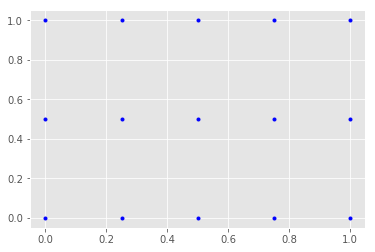

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X, Y, marker='.', color='blue', linestyle='none')

可以用zip得到网格平面上坐标点的数据：

In [8]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

好了，下面继续进入书中的内容

In [9]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # xs和ys是一样的
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [10]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

这里我们用matplotlib把图画出来：

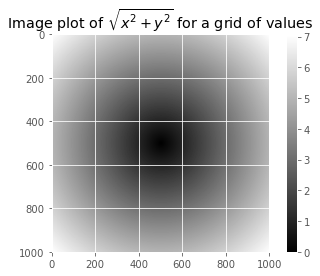

In [11]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

# 1 Expressing Conditional Logic as Array Operations (像数组操作一样表示逻辑条件)

`numpy.where`函数是一个向量版的三相表达式，`x if condition else y`。假设我们有一个布尔数组和两个数组：

In [12]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设如果cond中为true，我们去xarr中对应的值，否则就取yarr中的值。列表表达式的话会这么写：

In [13]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

这么做的话会有很多问题。首先，对于很大的数组，会比较慢。第二，对于多维数组不起作用。但`np.where`能让我们写得更简洁：

In [14]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

`np.where`中第二个和第三个参数不用必须是数组。where在数据分析中一个典型的用法是基于一个数组，产生一个新的数组值。假设我们有一个随机数字生成的矩阵，我们想要把所有的正数变为2，所有的负数变为-2。用where的话会非常简单：

In [15]:
arr = np.random.randn(4, 4)
arr

array([[ 0.80858392,  1.04933003, -1.4383493 ,  1.0374841 ],
       [ 0.68315062, -0.33745614, -0.69778967,  1.46872485],
       [ 0.65979765, -0.21151391,  0.5460513 ,  0.44654475],
       [ 1.0529518 ,  0.14364791,  0.01178379,  0.81516404]])

In [16]:
arr > 0

array([[ True,  True, False,  True],
       [ True, False, False,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True]])

In [17]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [ 2,  2,  2,  2]])

我们可以结合标量和数组。比如只把整数变为2，其他仍未原来的数字：

In [22]:
s = np.where(arr<=0, 0, arr) # set only positive value to 2
s

array([[0.80858392, 1.04933003, 0.        , 1.0374841 ],
       [0.68315062, 0.        , 0.        , 1.46872485],
       [0.65979765, 0.        , 0.5460513 , 0.44654475],
       [1.0529518 , 0.14364791, 0.01178379, 0.81516404]])

# 2 Mathematical and Statistical Methods (数学和统计方法)

一些能计算统计值的数学函数能基于整个数组，或者沿着一个axis（轴）。可以使用aggregations(often called reductions，汇总，或被叫做降维)，比如sum, mean, and std(标准差).

下面是一些aggregate statistics（汇总统计）：


In [23]:
arr = np.random.randn(5, 4)
arr

array([[ 1.43601586, -0.52387361,  0.04099534, -0.68710587],
       [-1.21439088, -0.36161969, -0.39105746, -1.31293602],
       [ 0.92624826, -1.21554839,  0.18300442,  0.34924706],
       [-0.01963896, -2.31064533, -0.96784567, -0.24210361],
       [ 0.48949555,  1.45794677,  0.72195379, -0.4489014 ]])

In [26]:
arr.mean()

-0.20453799154671573

In [27]:
np.mean(arr)

-0.20453799154671573

In [28]:
arr.sum()

-4.0907598309343145

mean, sum这样的函数能接受axis作为参数来计算统计数字，返回的结果维度更少：

In [29]:
arr.mean(axis=1)

array([ 0.06650793, -0.82000101,  0.06073784, -0.88505839,  0.55512368])

In [30]:
arr.sum(axis=0)

array([ 1.61772984, -2.95374026, -0.41294958, -2.34179983])

这里`arr.mean(1)`表示，compute mean acros the columns(计算各列之间的平均值)。`arr.sum(0)`表示，compute sum down the rows(计算各行总和)。

其他一些方法，像cumsum和cumprod不做汇总，而是产生一个中间结果的数组：

In [31]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

上面的计算是一个累加的结果，`0+1=1，1+2=3，3+3=6`以此类推。

In [32]:
np.cumsum?

对于多维数组，accumulation functions（累积函数）比如cumsum，返回的是同样大小的数组，但是部分聚合会沿着指示的轴向较低维度进行切片：

In [33]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [34]:
arr.cumsum(axis=0) # 沿着行加法

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [37]:
arr.cumprod(axis=1) # 沿着列乘法

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

这里有一些基本的统计计算方法：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/9mzrp.png)

# 3 Methods for Boolean Arrays（布尔数组的方法）

sum是用来计算布尔数组中有多少个true的：

In [41]:
arr = np.random.randn(100)
#(arr > 0).sum() # Number of positive values
arr

array([-1.4791725 ,  0.49126025, -0.30619296, -0.48125977, -0.73094929,
        1.32599855, -0.41515435,  0.4261642 , -0.59797132,  1.73826919,
        0.82443056, -0.75050053, -0.61221408, -2.33051503,  0.62703392,
        0.45126375, -0.96632534,  0.13672441,  0.03437951, -1.15015588,
       -1.90091914, -1.31975398,  0.68826883, -1.29003404, -0.66060207,
       -0.64625695,  0.262749  ,  1.76060744, -0.56541735, -1.47028496,
       -2.92617465, -2.44710088,  0.85123605,  0.16485458,  0.25612047,
       -0.80376467, -1.06616689, -0.13729586, -1.30302128,  0.02774111,
       -1.32190816,  1.00788449,  1.18086167, -0.41614192, -0.17793589,
        0.53524437, -0.71181973, -1.42298401, -0.12411299,  0.36210354,
        0.48050308, -0.48722569,  0.81397128, -0.58803307, -0.62569092,
        0.11399677, -0.60977226,  0.67427761, -1.828401  , -2.00812409,
        2.22959943, -0.25992417,  0.61193234, -0.81080001,  0.62884551,
       -1.16590251,  1.22278498,  0.54668272, -0.21454902,  0.02

In [42]:
(arr>0).sum()

48

有两个其他方法，any和all，对于布尔数组特别有用。any检测数组中只要有一个ture返回就是true，而all检测数组中都是true才会返回true。

In [43]:
bools = np.array([False, False, True, False])

In [44]:
bools.any()

True

In [45]:
bools.all()

False

# 4 Sorting（排序）

numpy中也有sort方法：

In [46]:
np.random.randn?
# 返回符合正态分布的数值

In [47]:
arr = np.random.randn(3,2)
arr

array([[-0.55462717,  0.21309695],
       [ 1.36886318,  1.23735918],
       [-1.84820756,  1.79510482]])

In [52]:
arr.sort(axis=0)

In [53]:
arr

array([[-1.84820756,  0.21309695],
       [-0.55462717,  1.36886318],
       [ 1.23735918,  1.79510482]])

如果是多维数组，还可以按axis来排序：

In [59]:
arr = np.random.randn(5, 3)
arr

array([[ 0.59563076, -1.80275896, -0.4429499 ],
       [ 0.17957411, -0.99225141,  0.27794048],
       [-0.50461232,  0.85117601, -0.11936353],
       [-1.53926077,  0.11947123, -0.87269227],
       [ 0.85751408, -0.87048495,  1.18356171]])

In [55]:
arr.sort(1)

In [56]:
arr.sort

array([[-1.21345792, -0.53224176,  0.30681236],
       [ 0.44884571,  0.90667971,  1.79226009],
       [-0.85484742, -0.57020463,  1.5345535 ],
       [-2.18597152, -0.31273234,  0.09184497],
       [ 0.15761387,  0.52653637,  1.60702051]])

In [60]:
arr.sort(0)
arr

array([[-1.53926077, -1.80275896, -0.87269227],
       [-0.50461232, -0.99225141, -0.4429499 ],
       [ 0.17957411, -0.87048495, -0.11936353],
       [ 0.59563076,  0.11947123,  0.27794048],
       [ 0.85751408,  0.85117601,  1.18356171]])

上面是直接调用数组的sort方法，会改变原有数组的顺序。但如果使用`np.sort()`函数的话，会生成一个新的排序后的结果。

一个计算分位数的快捷方法是先给数组排序，然后选择某个排名的值：

In [61]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [62]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6610832700455875

# 5 Unique and Other Set Logic (单一性和其他集合逻辑)

Numpy也有一些基本的集合操作用于一维数组。`np.unique`，能返回排好序且不重复的值：

In [63]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [64]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [65]:
np.unique(ints)

array([1, 2, 3, 4])

In [66]:
set(names)

{'Bob', 'Joe', 'Will'}

如果用纯python代码来实现的话，要这么写：

In [65]:
sorted(set(names))

['Bob', 'Joe', 'Will']

`np.in1d`, 测试一个数组的值是否在另一个数组里，返回一个布尔数组：

In [67]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [68]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

这里是一些数组的集合操作：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/du91n.png)